# Description
There is given training set and test data. I made a model to classify test data on training set by using Decision Tree.
In Decision tree classification there is two criterion one is gini other is entropy. I used both and found that accuracy is more in entropy criterion than gini criterion and then i projected the data onto different-different lower dimensions by applying PCA to see variation in accuracy with dimensions.
    In second part of problem I train the binary decision tree with increasing sizes of training set, say 10%, 20%, ..., 100%. and Made a plot to show how training and test accuracies vary with number of training samples.


# Obervation and conclusion

Gini criterion on whole training data - Accuracy 85.96%

entropy criterion on whole training data - Accuracy 94.73%

By using entropy criterion Accuracy is increased.

By applying PCA on training data and project data onto lower dimension we observed the variation of accuracy with dimensions.Highest Accuracy found on Dimension  9, Accuracy :  96.49122807017544

#### In this problem i used numpy, pandas, sklearn and graphviz libraries

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import decomposition
import graphviz

# Reading data from file
I have read data by using pandas "read_csv" module
where  trainX = Traing data
       trainY = Training Label
       testX  = Test data
       testY  = Test Label

In [3]:
trainX=pd.read_csv('trainX.csv',sep=',',header=None)
trainY=pd.read_csv('trainY.csv',sep=',',header=None)
testX=pd.read_csv('testX.csv',sep=',',header=None)
testY=pd.read_csv('testY.csv',sep=',',header=None)
print("Training data ")
trainX.head()

Training data 


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,12.83,22.33,85.26,503.2,0.10880,0.17990,0.16950,0.06861,0.2123,0.07254,...,15.20,30.15,105.30,706.0,0.1777,0.5343,0.6282,0.1977,0.3407,0.12430
1,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.1547,0.2231,0.1791,0.1155,0.2382,0.08553
2,17.93,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.04744,0.1538,0.05510,...,20.92,34.69,135.10,1320.0,0.1315,0.1806,0.2080,0.1136,0.2504,0.07948
3,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.1782,0.3841,0.5754,0.1872,0.3258,0.09720
4,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.2569,0.1054,0.3387,0.09638


# Building model on training set

### By using gini and entropy criterion

# 1. criterion = gini
To classify i used DecisionTreeClassifier

In [4]:
clf_gini = DecisionTreeClassifier(criterion ='gini')
clf_gini = clf_gini.fit(trainX,trainY)

### Classification of test data by using decision tree

In [5]:
y_pred = clf_gini.predict(testX)

### Calculating confusion matrix and Accuracy
confusion_matrix() is a function which return a confusion matrix

In [6]:
c=confusion_matrix(testY, y_pred)
print("Confusion matrix is :- ")
print(c)
print("")
print("Accuracy :",accuracy_score(testY,y_pred)*100)
print("Number of nodes are :- ",clf_gini.tree_.node_count)

Confusion matrix is :- 
[[28  4]
 [ 5 20]]

Accuracy : 84.21052631578947
Number of nodes are :-  33


## Calculation for number of leaf nodes

In [7]:
leaf= clf_gini.tree_.children_left == -1
#No. of leaf nodes
ct=0
for k in leaf:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)

Number of leaf nodes =  17


By using gini criterion Accuracy is approx 85.96%  

## Plotting tree model

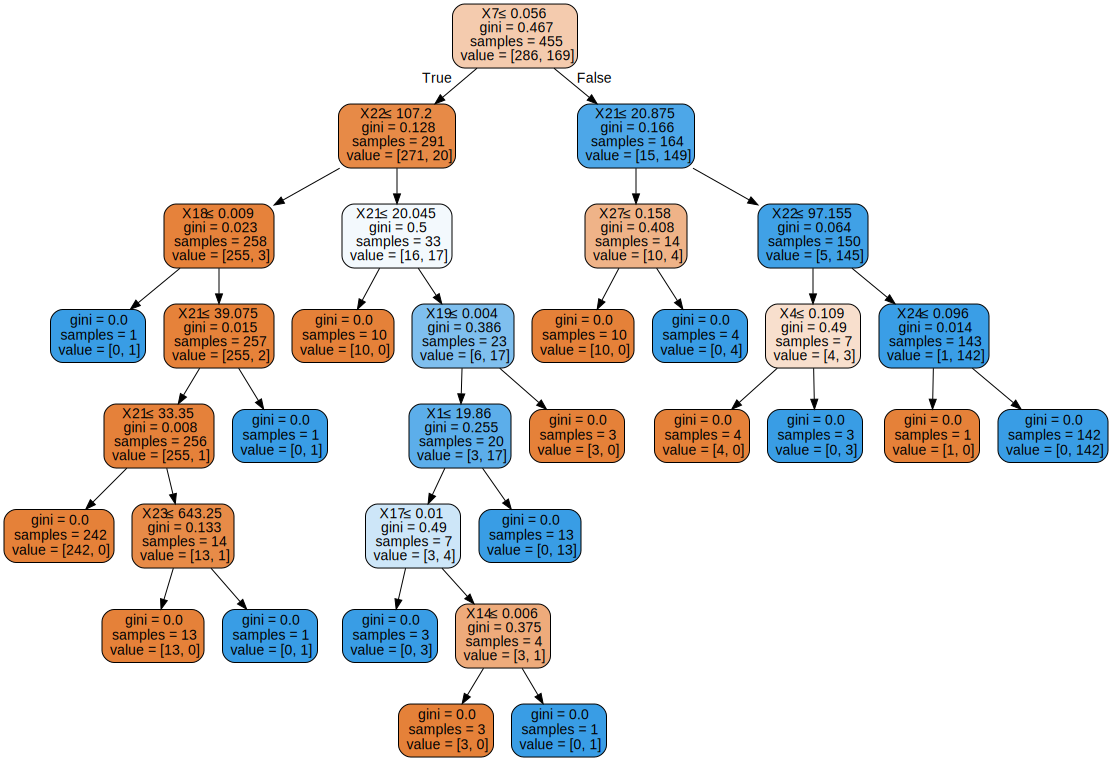

In [8]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data) 
graph

# 2. criterion = entropy

To classify i used DecisionTreeClassifier


In [9]:
clf_entropy = DecisionTreeClassifier(criterion ='entropy')
clf_entropy = clf_entropy.fit(trainX,trainY)
y_pred = clf_entropy.predict(testX)

### Calculating confusion matrix and Accuracy
confusion_matrix() is a function which return a confusion matrix

In [13]:
c=confusion_matrix(testY, y_pred)
print("Confusion matrix is :- ")
print(c)
print("")
print("Accuracy :",accuracy_score(testY,y_pred)*100)
print("Number of nodes are :- ",clf_entropy.tree_.node_count)

Confusion matrix is :- 
[[32  0]
 [ 3 22]]

Accuracy : 94.73684210526315
Number of nodes are :-  29


# Calculation for number of leaf nodes

In [30]:
leaf= clf_entropy.tree_.children_left == -1
#No. of leaf nodes
ct=0
for k in leaf:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)

Number of leaf nodes =  15


We have found that by using entropy criterion accuracy is increased to approx 94.73%

## Plotting tree model

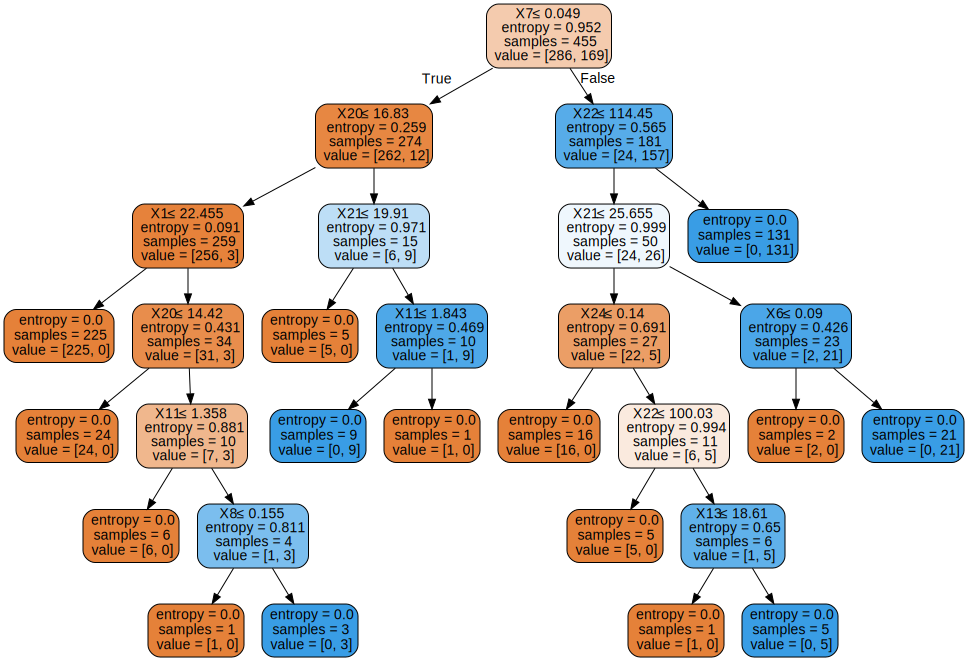

In [14]:
dot_data = tree.export_graphviz(clf_entropy, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

# By applying PCA

I applied PCA and reduce the dimension from 30 to lower dimension  here i used loop for differet-different dimensions

# 1. criterion = gini

In [15]:

for i in range(29,0,-1):
    # pca on traing set
    pca = decomposition.PCA(n_components=i)
    pca.fit(trainX)
    trainX_pca = pca.transform(trainX)
    
    # pca on test data
    testX_pca = pca.transform(testX)
    
    clf_gini = DecisionTreeClassifier(criterion ='gini')
    clf_gini = clf_gini.fit(trainX_pca,trainY)
    y_pred = clf_gini.predict(testX_pca)
    c=confusion_matrix(testY, y_pred)
    print("Dimension ",i, " , Accuracy : ",accuracy_score(testY,y_pred)*100)
    #print("")




Dimension  29  , Accuracy :  89.47368421052632
Dimension  28  , Accuracy :  87.71929824561403
Dimension  27  , Accuracy :  92.98245614035088
Dimension  26  , Accuracy :  89.47368421052632
Dimension  25  , Accuracy :  92.98245614035088
Dimension  24  , Accuracy :  92.98245614035088
Dimension  23  , Accuracy :  91.22807017543859
Dimension  22  , Accuracy :  91.22807017543859
Dimension  21  , Accuracy :  91.22807017543859
Dimension  20  , Accuracy :  89.47368421052632
Dimension  19  , Accuracy :  91.22807017543859
Dimension  18  , Accuracy :  91.22807017543859
Dimension  17  , Accuracy :  91.22807017543859
Dimension  16  , Accuracy :  87.71929824561403
Dimension  15  , Accuracy :  92.98245614035088
Dimension  14  , Accuracy :  92.98245614035088
Dimension  13  , Accuracy :  92.98245614035088
Dimension  12  , Accuracy :  92.98245614035088
Dimension  11  , Accuracy :  94.73684210526315
Dimension  10  , Accuracy :  96.49122807017544
Dimension  9  , Accuracy :  96.49122807017544
Dimension  8  

# 2. criterion = entropy

In [16]:

for i in range(29,0,-1):
    # pca on traing set
    pca = decomposition.PCA(n_components=i)
    pca.fit(trainX)
    trainX_pca = pca.transform(trainX)
    
    # pca on test data
    testX_pca = pca.transform(testX)
    
    clf_gini = DecisionTreeClassifier(criterion ='entropy')
    clf_gini = clf_gini.fit(trainX_pca,trainY)
    y_pred = clf_gini.predict(testX_pca)
    c=confusion_matrix(testY, y_pred)
    
    print("Dimension ",i," , Accuracy :- ",accuracy_score(testY,y_pred)*100)
    #print("")


Dimension  29  , Accuracy :-  92.98245614035088
Dimension  28  , Accuracy :-  89.47368421052632
Dimension  27  , Accuracy :-  92.98245614035088
Dimension  26  , Accuracy :-  87.71929824561403
Dimension  25  , Accuracy :-  92.98245614035088
Dimension  24  , Accuracy :-  92.98245614035088
Dimension  23  , Accuracy :-  92.98245614035088
Dimension  22  , Accuracy :-  89.47368421052632
Dimension  21  , Accuracy :-  91.22807017543859
Dimension  20  , Accuracy :-  91.22807017543859
Dimension  19  , Accuracy :-  87.71929824561403
Dimension  18  , Accuracy :-  91.22807017543859
Dimension  17  , Accuracy :-  89.47368421052632
Dimension  16  , Accuracy :-  92.98245614035088
Dimension  15  , Accuracy :-  94.73684210526315
Dimension  14  , Accuracy :-  96.49122807017544
Dimension  13  , Accuracy :-  92.98245614035088
Dimension  12  , Accuracy :-  91.22807017543859
Dimension  11  , Accuracy :-  92.98245614035088
Dimension  10  , Accuracy :-  96.49122807017544
Dimension  9  , Accuracy :-  94.73684210

# Second part binary decision tree with increasing size of training set

### plot to show how training and test accuracies vary with number of training samples.

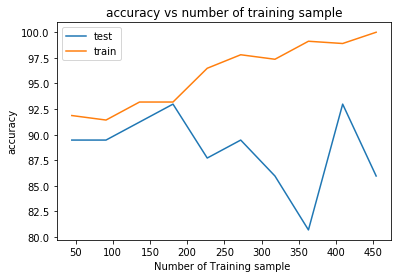

In [18]:
test_acc=[]
train_acc=[]
no_train_sample=[]
c=1.0
for i in range(1,11):
    c=c-0.1
    X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size = c, random_state = 100)
    clf_gini = DecisionTreeClassifier(criterion = "gini")
    clf_gini.fit(X_train,Y_train)
    y_pred_test = clf_gini.predict(testX)
    y_pred_train = clf_gini.predict(trainX)
    test_acc.append(accuracy_score(testY,y_pred_test)*100)
    train_acc.append(accuracy_score(trainY,y_pred_train)*100)
    no_train_sample.append(len(X_train))

import matplotlib.pyplot as plt
plt.xlabel("Number of Training sample ")
plt.ylabel("accuracy")
plt.title("accuracy vs number of training sample")
plt.plot(no_train_sample,test_acc, label='test')
plt.plot(no_train_sample,train_acc,label='train')
plt.legend()
plt.show()

# Case 1. using 10% of training set


#### Confusion matrix, accuracy and Plot of tree by using 10% of training set

Confusion Matrix:- 
[[30  2]
 [ 4 21]]
Accuracy : 89.47368421052632
Number of leaf nodes =  3
Number of nodes are :-  5


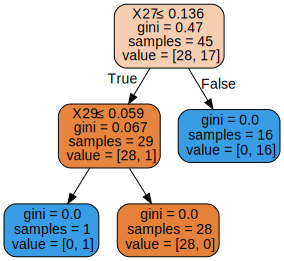

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size = 0.9, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini.fit(X_train,Y_train)
y_pred = clf_gini.predict(testX)

print("Confusion Matrix:- ")
print(confusion_matrix(testY, y_pred))
print("Accuracy :",accuracy_score(testY,y_pred)*100)

dot_data = tree.export_graphviz(clf_gini, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data) 

l = clf_gini.tree_.children_left==-1
ct=0
for k in l:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)
print("Number of nodes are :- ",clf_gini.tree_.node_count)
graph

# Case 2. using 20% of training set


#### Confusion matrix, accuracy and Plot of tree by using 20% of training set

Confusion Matrix:- 
[[27  5]
 [ 1 24]]
Accuracy : 89.47368421052632
Number of leaf nodes =  4
Number of nodes are :-  7


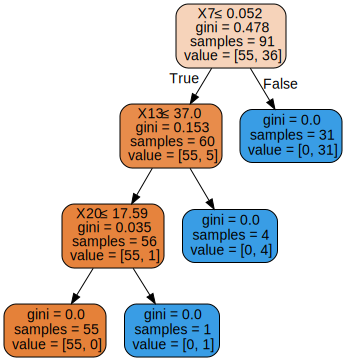

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size = 0.8, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini.fit(X_train,Y_train)
y_pred = clf_gini.predict(testX)

print("Confusion Matrix:- ")
print(confusion_matrix(testY, y_pred))
print("Accuracy :",accuracy_score(testY,y_pred)*100)

dot_data = tree.export_graphviz(clf_gini, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
l = clf_gini.tree_.children_left==-1
ct=0
for k in l:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)
print("Number of nodes are :- ",clf_gini.tree_.node_count)
graph

# Case 3. using 30% of training set


#### Confusion matrix, accuracy and Plot of tree by using 30% of training set

Confusion Matrix:- 
[[28  4]
 [ 1 24]]
Accuracy : 91.22807017543859
Number of leaf nodes =  6
Number of nodes are :-  11


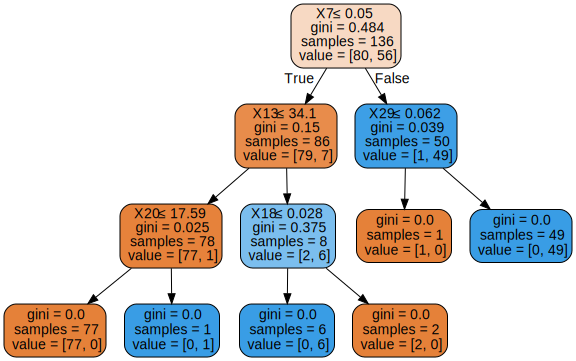

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size = 0.7, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini.fit(X_train,Y_train)
y_pred = clf_gini.predict(testX)

print("Confusion Matrix:- ")
print(confusion_matrix(testY, y_pred))
print("Accuracy :",accuracy_score(testY,y_pred)*100)

dot_data = tree.export_graphviz(clf_gini, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
l = clf_gini.tree_.children_left==-1
ct=0
for k in l:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)
print("Number of nodes are :- ",clf_gini.tree_.node_count)
graph

# Case 4. using 40% of training set


#### Confusion matrix, accuracy and Plot of tree by using 40% of training set

Confusion Matrix:- 
[[30  2]
 [ 1 24]]
Accuracy : 94.73684210526315
Number of leaf nodes =  7
Number of nodes are :-  13


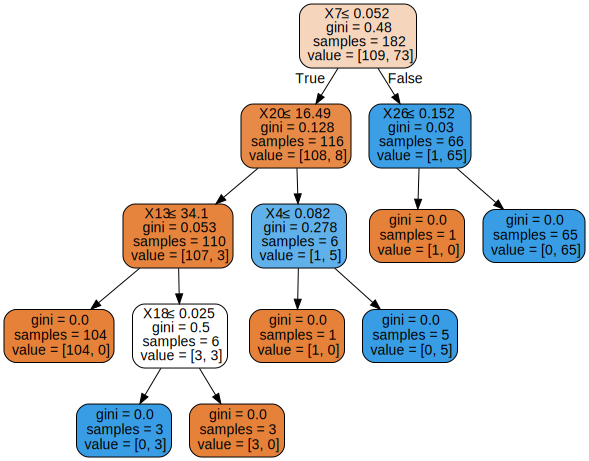

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size = 0.6, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini.fit(X_train,Y_train)
y_pred = clf_gini.predict(testX)

print("Confusion Matrix:- ")
print(confusion_matrix(testY, y_pred))
print("Accuracy :",accuracy_score(testY,y_pred)*100)

dot_data = tree.export_graphviz(clf_gini, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
l = clf_gini.tree_.children_left==-1
ct=0
for k in l:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)
print("Number of nodes are :- ",clf_gini.tree_.node_count)
graph

# Case 5. using 50% of training set


#### Confusion matrix, accuracy and Plot of tree by using 50% of training set

Confusion Matrix:- 
[[32  0]
 [ 4 21]]
Accuracy : 92.98245614035088
Number of leaf nodes =  11
Number of nodes are :-  21


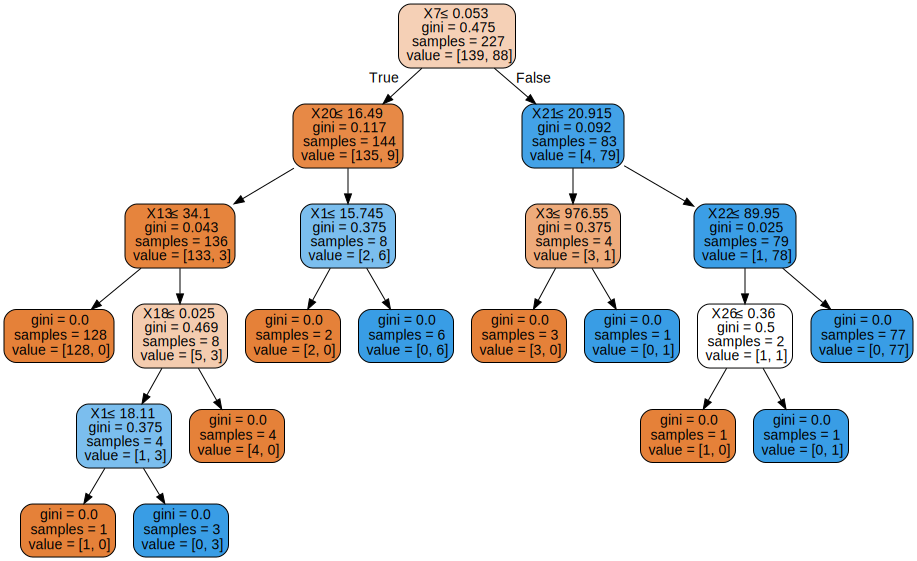

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size = 0.5, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini.fit(X_train,Y_train)
y_pred = clf_gini.predict(testX)

print("Confusion Matrix:- ")
print(confusion_matrix(testY, y_pred))
print("Accuracy :",accuracy_score(testY,y_pred)*100)

dot_data = tree.export_graphviz(clf_gini, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
l = clf_gini.tree_.children_left==-1
ct=0
for k in l:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)
print("Number of nodes are :- ",clf_gini.tree_.node_count)
graph

# Case 6. using 60% of training set


#### Confusion matrix, accuracy and Plot of tree by using 60% of training set

Confusion Matrix:- 
[[28  4]
 [ 4 21]]
Accuracy : 85.96491228070175
Number of leaf nodes =  12
Number of nodes are :-  23


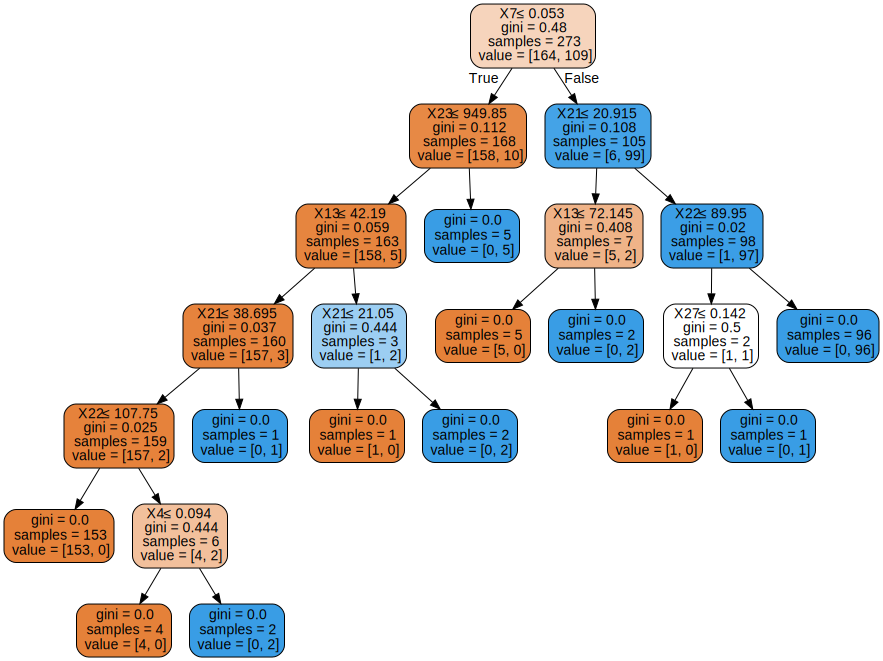

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size = 0.4, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini.fit(X_train,Y_train)
y_pred = clf_gini.predict(testX)

print("Confusion Matrix:- ")
print(confusion_matrix(testY, y_pred))
print("Accuracy :",accuracy_score(testY,y_pred)*100)

dot_data = tree.export_graphviz(clf_gini, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
l = clf_gini.tree_.children_left==-1
ct=0
for k in l:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)
print("Number of nodes are :- ",clf_gini.tree_.node_count)
graph

# Case 7. using 70% of training set


#### Confusion matrix, accuracy and Plot of tree by using 70% of training set

Confusion Matrix:- 
[[27  5]
 [ 5 20]]
Accuracy : 82.45614035087719
Number of leaf nodes =  14
Number of nodes are :-  27


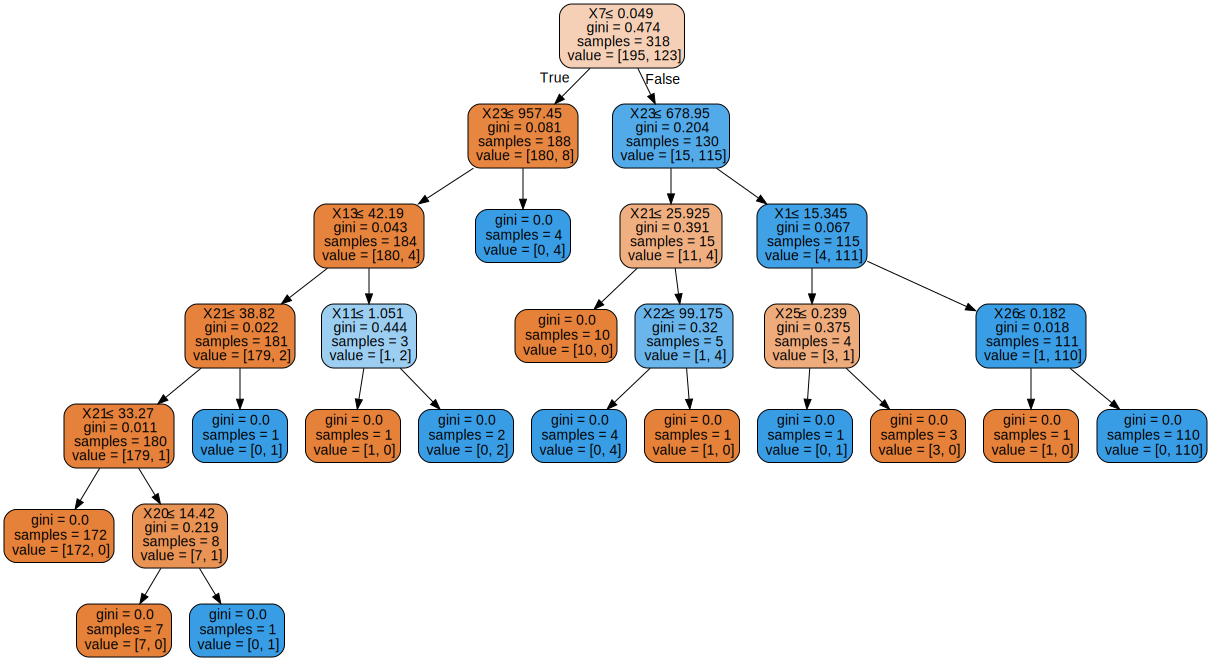

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size = 0.3, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini.fit(X_train,Y_train)
y_pred = clf_gini.predict(testX)

print("Confusion Matrix:- ")
print(confusion_matrix(testY, y_pred))
print("Accuracy :",accuracy_score(testY,y_pred)*100)

dot_data = tree.export_graphviz(clf_gini, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data) 
l = clf_gini.tree_.children_left==-1
ct=0
for k in l:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)
print("Number of nodes are :- ",clf_gini.tree_.node_count)
graph

# Case 8. using 80% of training set


#### Confusion matrix, accuracy and Plot of tree by using 80% of training set

Confusion Matrix:- 
[[29  3]
 [ 7 18]]
Accuracy : 82.45614035087719
Number of leaf nodes =  15
Number of nodes are :-  29


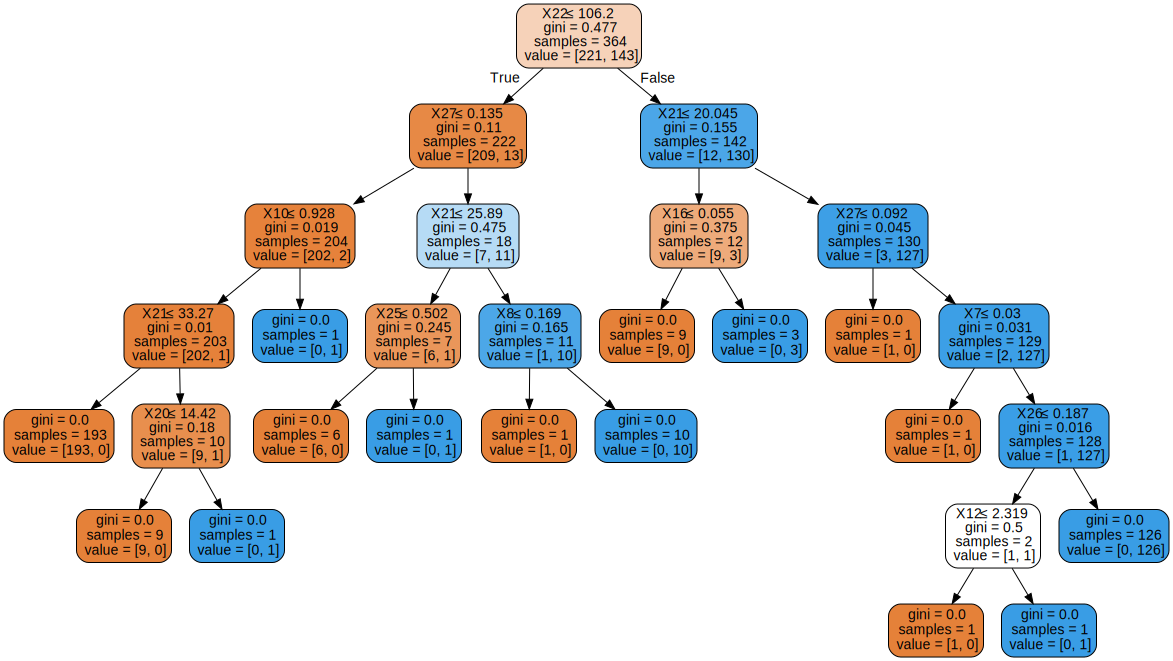

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size = 0.2, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini.fit(X_train,Y_train)
y_pred = clf_gini.predict(testX)

print("Confusion Matrix:- ")
print(confusion_matrix(testY, y_pred))
print("Accuracy :",accuracy_score(testY,y_pred)*100)

dot_data = tree.export_graphviz(clf_gini, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data) 
l = clf_gini.tree_.children_left==-1
ct=0
for k in l:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)
print("Number of nodes are :- ",clf_gini.tree_.node_count)
graph

# Case 9. using 90% of training set


#### Confusion matrix, accuracy and Plot of tree by using 90% of training set

Confusion Matrix:- 
[[31  1]
 [ 4 21]]
Accuracy : 91.22807017543859
Number of leaf nodes =  16
Number of nodes are :-  31


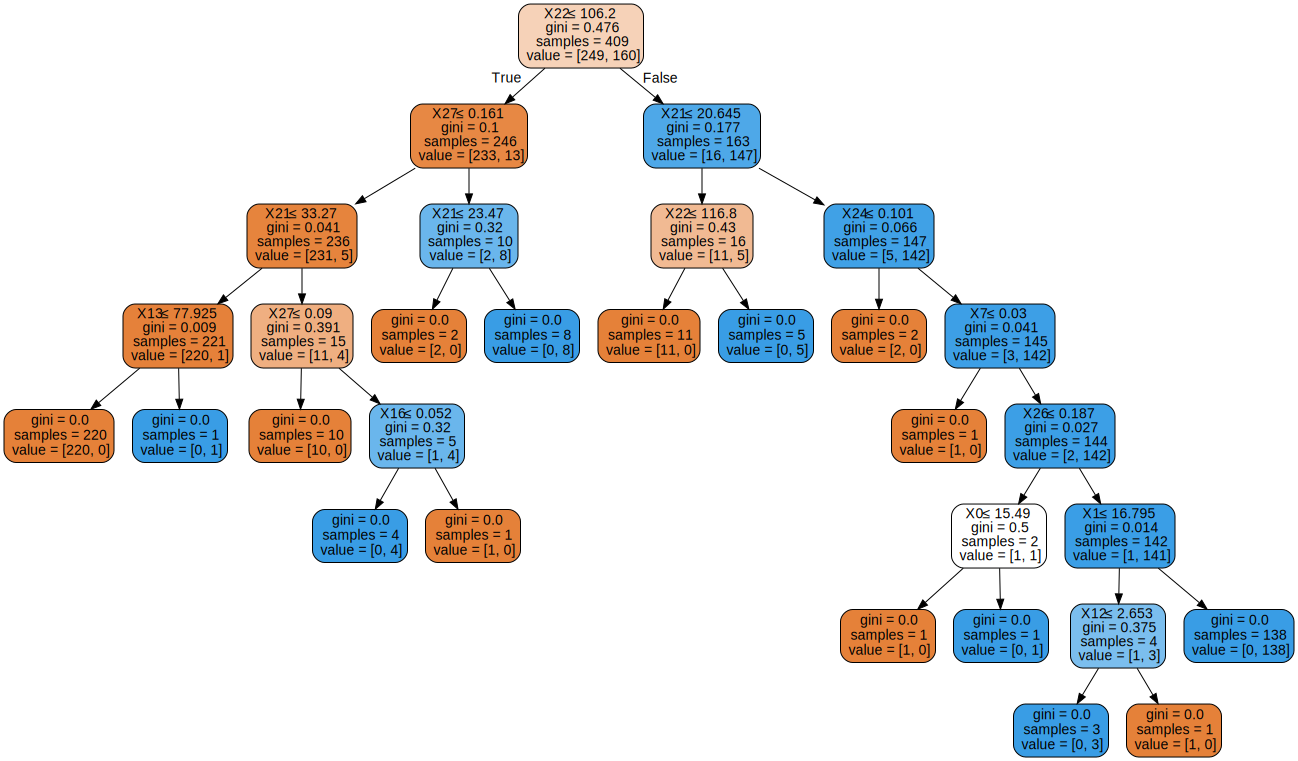

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size = 0.1, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini.fit(X_train,Y_train)
y_pred = clf_gini.predict(testX)

print("Confusion Matrix:- ")
print(confusion_matrix(testY, y_pred))
print("Accuracy :",accuracy_score(testY,y_pred)*100)

dot_data = tree.export_graphviz(clf_gini, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data) 
l = clf_gini.tree_.children_left==-1
ct=0
for k in l:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)
print("Number of nodes are :- ",clf_gini.tree_.node_count)
graph

# Case 10. using 100% of training set


#### Confusion matrix, accuracy and Plot of tree by using 100% of training set

Confusion Matrix:- 
[[28  4]
 [ 5 20]]
Accuracy : 84.21052631578947
Number of leaf nodes =  17
Number of nodes are :-  33


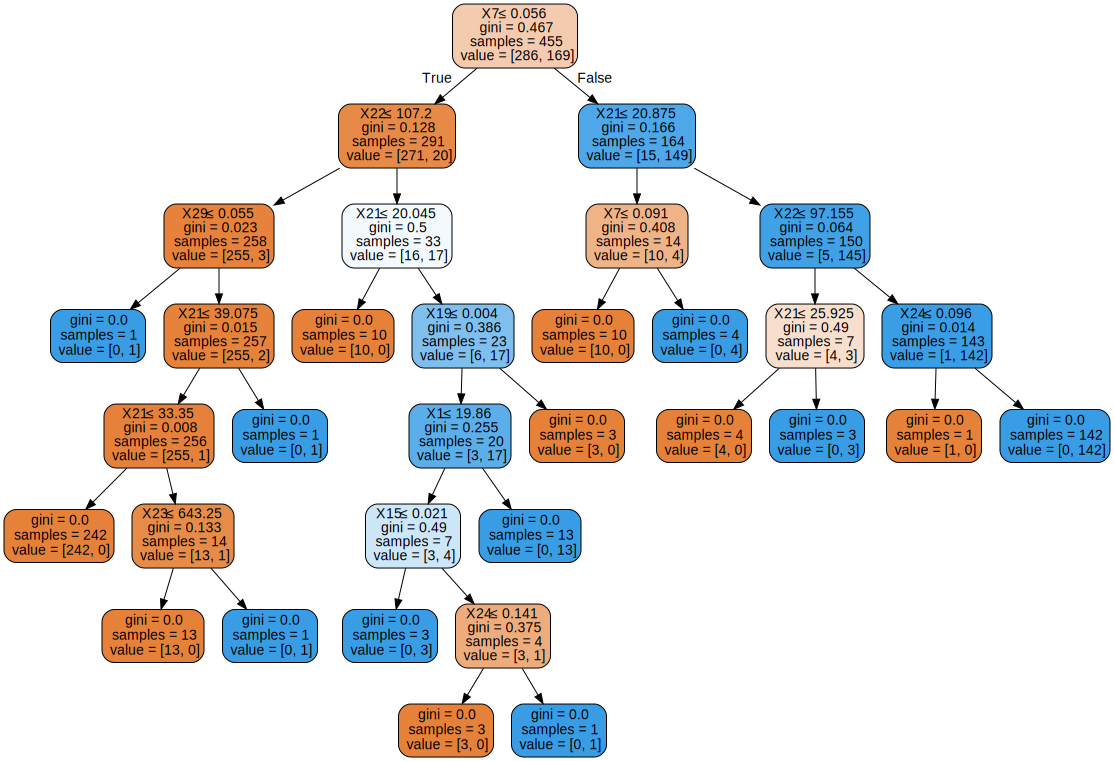

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size = 0.0, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini.fit(X_train,Y_train)
y_pred = clf_gini.predict(testX)

print("Confusion Matrix:- ")
print(confusion_matrix(testY, y_pred))
print("Accuracy :",accuracy_score(testY,y_pred)*100)

dot_data = tree.export_graphviz(clf_gini, out_file=None, filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
l = clf_gini.tree_.children_left==-1
ct=0
for k in l:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)
print("Number of nodes are :- ",clf_gini.tree_.node_count)
graph